In [2]:
# Load the data
from datasets import load_dataset
import seaborn as sns

dataset = load_dataset("reddit_tifu", 'long')
dataset

Generating train split:   0%|          | 0/42139 [00:00<?, ? examples/s]

Dataset reddit_tifu downloaded and prepared to /Users/shubi/.cache/huggingface/datasets/reddit_tifu/long/1.1.0/1c73fb08807b54ec26b025829b2a3d90c6f7466dac20801c825571af9514c049. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['ups', 'num_comments', 'upvote_ratio', 'score', 'documents', 'tldr', 'title'],
        num_rows: 42139
    })
})

In [31]:

import pandas as pd
raw_df = pd.DataFrame(dataset['train'])
raw_df

,ups,num_comments,upvote_ratio,score,documents,tldr,title
0,115.0,23.0,0.88,115.0,this actually happened a couple of years ago. ...,confuse a 5th grade girl for a boy in front of...,gender-stereotyping
1,16.0,12.0,0.79,16.0,"it was last october, but i'm feeling the fall-...","i found my estranged dad, thought i loved him ...",telling my dad that i love him.
2,55.0,10.0,0.85,55.0,so i had the brilliant idea to use veet hair r...,had my balls burned by sauron and was left dev...,i was deveeted...
3,90.0,20.0,0.92,90.0,today i was going to have a bath after a long ...,peppermint + bath = burning cold ladybits.,wanting a pepperminty bath.
4,81.0,18.0,0.79,81.0,"i haven't had a bath in practically years so, ...","got too high and too hot in the bath, almost c...",having a spliff in the bath.
...,...,...,...,...,...,...,...
42134,105.0,18.0,0.94,105.0,this happened back in middle school.\n\nmy fam...,forgot my quarter for lunch at school for a we...,forgetting my quarter for lunch
42135,96.0,64.0,0.92,96.0,my girlfriend told me she has no hair beneath ...,girlfriend prefers clean shaven groin. i try t...,trying to shave my pubes for the first time
42136,726.0,110.0,0.91,726.0,today at work i accidentally crashed a row of ...,today i broke a window that costs more then i ...,breaking a $900 window with a shopping cart.
42137,26.0,5.0,0.77,26.0,so as u can tell from the title it didn't happ...,i invited over new girlfriend for dinner to sp...,slicing open my finger on first valentines wit...


In [74]:
df = raw_df.copy()
# discard punctuation
for col in ['tldr', 'documents']:
    df[col+'_text'] = df[col].str.replace('[^\w\s]','', regex=True) # remove punctuation
    df[col + '_num_words'] = df[col+'_text'].str.split().str.len() # count words
    df[col + '_sentences'] = df[col].str.split('.') # split into sentences
    # drop empty sentences
    df[col + '_sentences'] = df[col + '_sentences'].apply(lambda x: [s for s in x if len(s) > 0])
    df[col + '_num_sentences'] = df[col + '_sentences'].str.len() # count sentences
#discard stories with tldr longer than 100 words
df = df[df['tldr_num_words'] <= 100]
df = df[df['documents_num_words'] <= 600]




In [85]:
df.describe()

,ups,num_comments,upvote_ratio,score,tldr_num_words,tldr_num_sentences,documents_num_words,documents_num_sentences
count,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000,35897.000000
mean,271.480681,36.966320,0.783693,271.480681,19.123632,1.413266,296.500933,17.340474
std,1675.463914,147.074639,0.164061,1675.463914,10.735081,0.821794,132.806521,9.106639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.700000,3.000000,12.000000,1.000000,191.000000,11.000000
50%,11.000000,7.000000,0.830000,11.000000,17.000000,1.000000,278.000000,16.000000
75%,47.000000,19.000000,0.900000,47.000000,24.000000,2.000000,393.000000,23.000000
max,85249.000000,4030.000000,1.000000,85249.000000,100.000000,14.000000,600.000000,232.000000


In [75]:
melted = df[['tldr_num_words', 'documents_num_words']].melt()

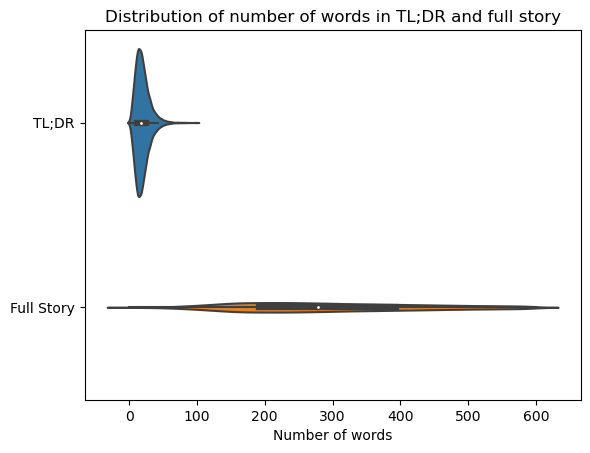

In [84]:
#violin plot
sns.violinplot(data=melted, x='value', y='variable')
import matplotlib.pyplot as plt
plt.xlabel('Number of words')
plt.title('Distribution of number of words in TL;DR and full story')
plt.yticks([0,1], ['TL;DR', 'Full Story'])
plt.ylabel('')
plt.show()

df['tldr'].str.split('.')

In [49]:
df['tldr'].str.split('.')[1]

['i found my estranged dad, thought i loved him after getting to know him, got to know him better and changed my mind',
 '']

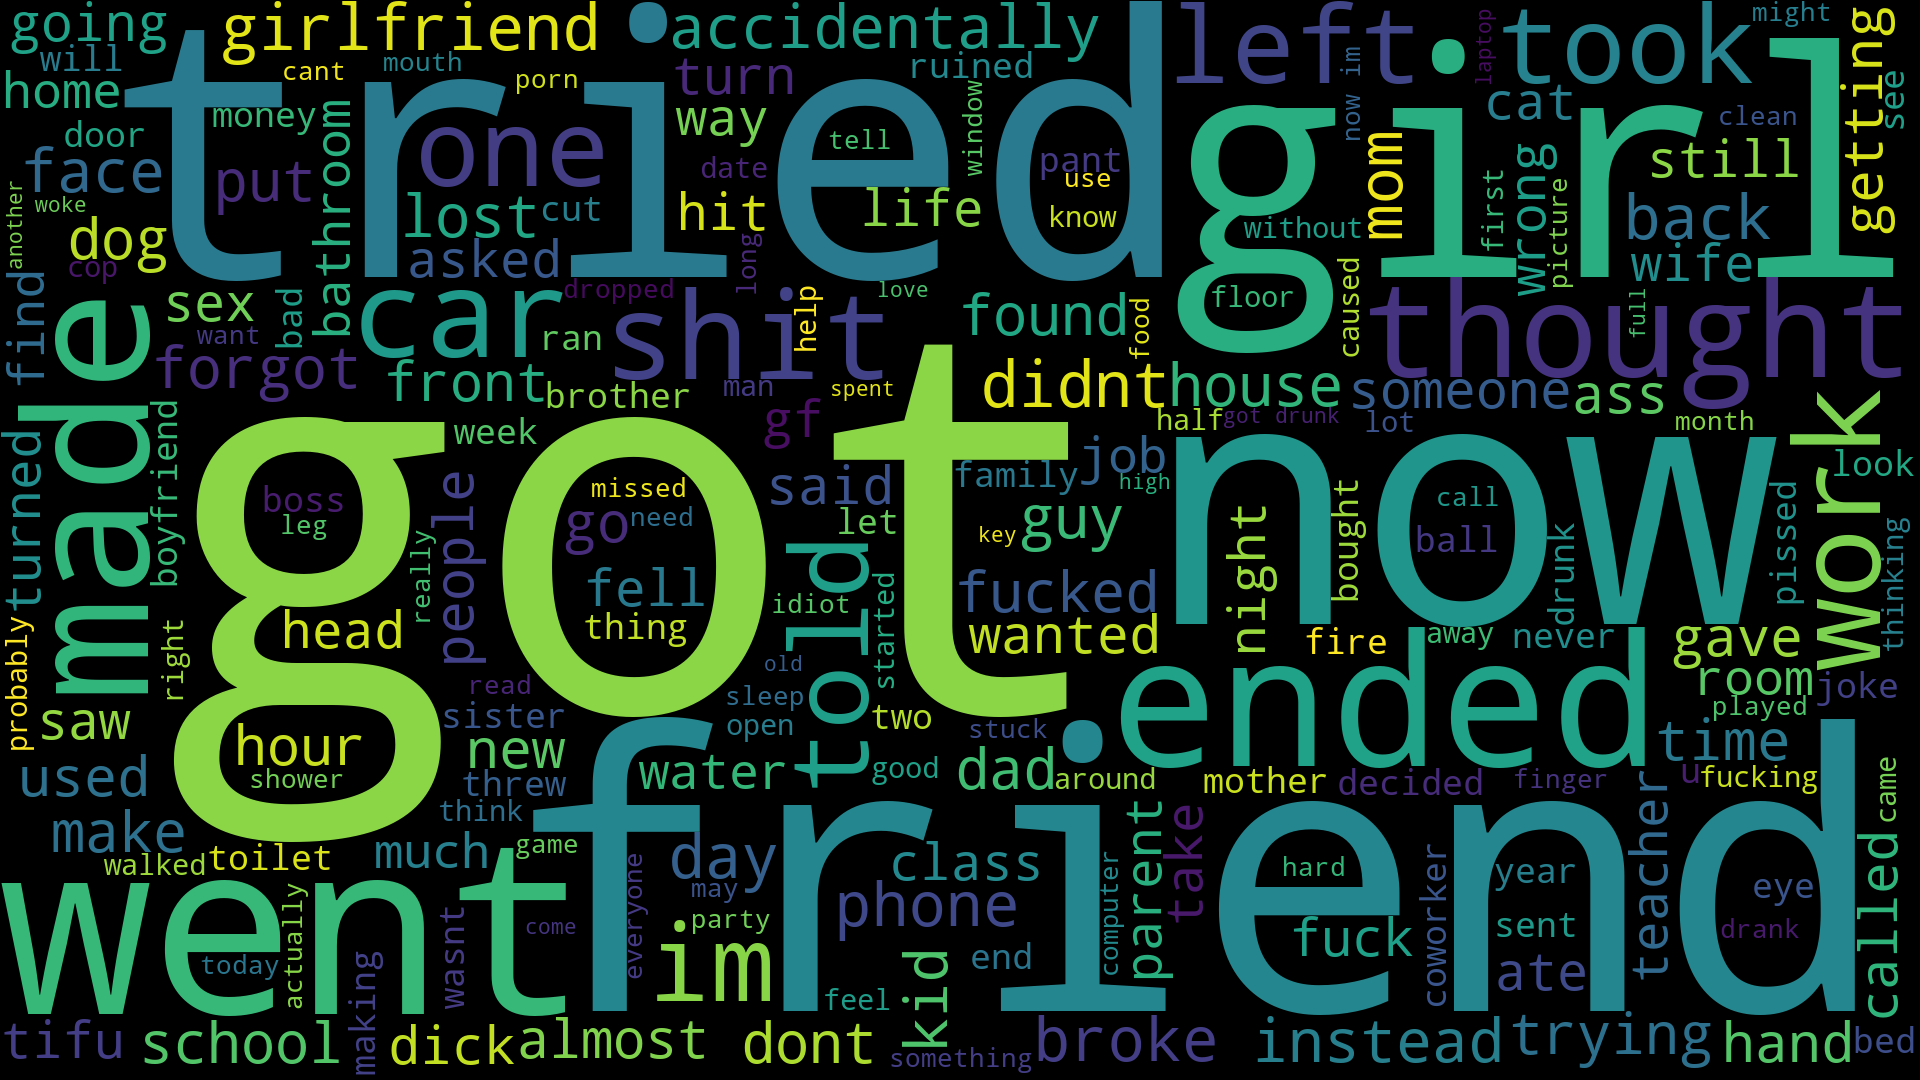

In [61]:
from wordcloud import WordCloud
WordCloud(width=1920, height=1080).generate(' '.join(df['tldr_text'])).to_image()